In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import preproccessing as prep
from evaluation import show_scenarios_evaluation



TODO:
- [ ] description usdpln short series
- [ ] estimate params short series
- [ ] forecast long
- [ ] describe short series
- [ ] describe full series
- [ ] forecast with error

In [109]:
acwi = pd.read_excel('acwi_usd_net_31.11.23.xlsx',index_col='Date', parse_dates=True)
acwi = acwi.squeeze()
acwi = (acwi+1).cumprod()
acwi_returns = prep.log_returns(acwi)
acwi_short = acwi['2003-01-01':]
acwi_short_returns = acwi_returns['2003-01-01':]

In [110]:
usdpln = prep.loadStooqData('usdpln','2002-12-01','d')
usdpln = usdpln.resample('BM').last()
usdpln_ret = prep.log_returns(usdpln)[:'2023-10-31']
usdpln_ret.name = 'usdpln'


In [111]:
acwi_pln = (acwi_short * usdpln).dropna()
acwi_pln_returns = prep.log_returns(acwi_pln)

-0.6609381983341514

In [113]:
prep.assets_performance(acwi_short_returns)

Annualised Mean     0.077396
Annualised Sigma    0.156670
Skew               -0.939333
Kurtosis            2.822137
Sharp_ratio         1.047969
Max drowdawn       -0.549231
dtype: float64

In [114]:
prep.assets_performance(acwi_pln_returns)

Annualised Mean     0.083851
Annualised Sigma    0.121528
Skew               -0.303148
Kurtosis            0.715677
Sharp_ratio         1.535002
Max drowdawn       -0.412454
dtype: float64

In [118]:
print(acwi_short_returns.corr(usdpln_ret))
print(acwi_pln_returns.corr(usdpln_ret))

-0.6609381983341514
0.25503745765425095


<AxesSubplot:xlabel='Data'>

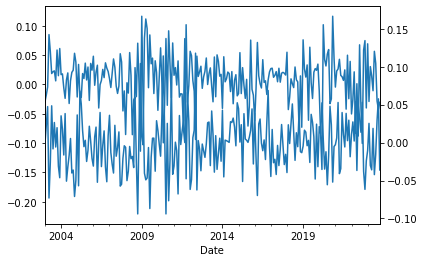

In [120]:
fig, ax = plt.subplots()
acwi_short_returns.plot(ax=ax)
ax2 = ax.twinx()
usdpln_ret.plot(ax=ax2)

<AxesSubplot:xlabel='Data'>

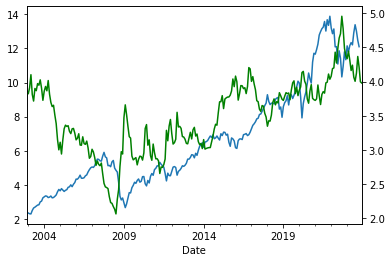

In [123]:
fig, ax = plt.subplots()
acwi_short.plot(ax=ax)
ax2 = ax.twinx()
usdpln.plot(ax=ax2, color='green')

In [119]:
exog = sm.add_constant(acwi_short_returns)
endog = usdpln_ret
model = sm.regression.linear_model.OLS(endog=endog,exog=exog)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 usdpln   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     192.4
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           9.13e-33
Time:                        23:23:03   Log-Likelihood:                 529.68
No. Observations:                 250   AIC:                            -1055.
Df Residuals:                     248   BIC:                            -1048.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0040      0.002      2.167      0.031       0.000       0.008
ACWI          -0.5675      0.041    -13.870      0.000      -0.648      -0.487
==============================================================================
Omnibus:                        8.470   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.418
Skew:                           0.398   Prob(JB):                       0.0149
Kurtosis:                       3.420   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [162]:
res.scale**0.5
res.mse_resid**0.5

0.02919833056160542

In [104]:
acwi_LS = acwi_returns[:'2003-01-01']
prep.assets_performance(acwi_LS)

Annualised Mean     0.057434
Annualised Sigma    0.150005
Skew               -0.551796
Kurtosis            0.684068
Sharp_ratio         0.633537
Max drowdawn       -0.468131
dtype: float64

In [126]:
prep.assets_performance(usdpln_ret)

Annualised Mean     0.004598
Annualised Sigma    0.134511
Skew                0.712642
Kurtosis            1.777890
Sharp_ratio        -0.654192
Max drowdawn       -0.497549
dtype: float64

In [154]:
usdpln_LS_returns = res.predict(sm.add_constant(acwi_LS)) + np.random.choice(res.resid,len(acwi_LS))
prep.assets_performance(usdpln_LS_returns)

Annualised Mean     0.011791
Annualised Sigma    0.122781
Skew               -0.006407
Kurtosis           -0.462570
Sharp_ratio        -0.513742
Max drowdawn       -0.241274
dtype: float64

In [133]:
usdpln_LS_returns[-1]

0.06525189655612121

In [157]:
acwi_pln_LS = (1 + acwi_LS)*(1+usdpln_LS_returns)
prep.assets_performance(acwi_pln_LS)

Annualised Mean      12.057664
Annualised Sigma      0.121079
Skew                  0.010823
Kurtosis              0.314207
Sharp_ratio         344.114136
Max drowdawn          0.000000
dtype: float64

In [140]:
usdpln_LS = np.zeros_like(acwi_LS+1)
usdpln_LS[-1] = usdpln[0]
for t in range(len(usdpln_LS)-1,-1,-1):
    usdpln_LS[t] = usdpln_LS[t]/np.exp(usdpln_LS_returns[t])


Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1078, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 297, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "c:\Users\matsz\miniconda3\envs\portfolio-optimisation\lib\site-packages\debugpy\_vendored\pydevd\pydevd.py", line 1976, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "c:\Users\matsz\miniconda3\envs\portfolio-optimisation\lib\site-packages\debugpy\_vendored\pydevd\pydevd.py", line 2011, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


KeyboardInterrupt: 

<AxesSubplot:xlabel='Date'>

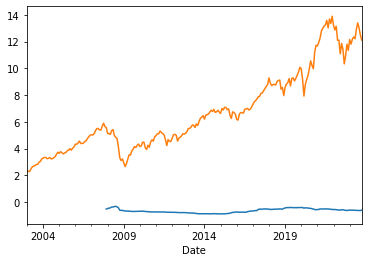

In [78]:
corr = endog.rolling(60).corr(exog.iloc[:,1])
fig, ax = plt.subplots()
corr.plot(ax=ax)
acwi['2003-01-01':].plot(ax=ax)

In [51]:
acwi_eur = pd.read_csv('acwi_25.08.23.csv',index_col='Date', parse_dates=True)
acwi_eur = acwi_eur.squeeze()
#acwi = (acwi+1).cumprod()
acwi_eur.info()
acwi_eur_ret = prep.log_returns(acwi_eur)

<class 'pandas.core.series.Series'>
DatetimeIndex: 428 entries, 1987-12-01 to 2023-07-01
Series name: MSCI ACWI
Non-Null Count  Dtype  
--------------  -----  
428 non-null    float64
dtypes: float64(1)
memory usage: 6.7 KB


In [60]:
eurpln = prep.loadStooqData('eurpln','2002-12-01','d')
eurpln = usdpln.resample('MS').last()
eurpln_ret = prep.log_returns(eurpln)
eurpln_ret.name = 'eurpln'

In [61]:
exog = sm.add_constant(acwi_eur_ret['2003-01-01':])
endog = eurpln_ret['2003-01-01':'2023-07-31']
model = sm.regression.linear_model.OLS(endog=endog,exog=exog)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 eurpln   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     11.38
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           0.000863
Time:                        20:55:22   Log-Likelihood:                 458.34
No. Observations:                 247   AIC:                            -912.7
Df Residuals:                     245   BIC:                            -905.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.002      0.692      0.489      -0.003       0.007
MSCI ACWI     -0.2122      0.063     -3.373      0.001      -0.336      -0.088
==============================================================================
Omnibus:                       27.127   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.994
Skew:                           0.684   Prob(JB):                     2.07e-09
Kurtosis:                       4.419   Cond. No.                         26.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
endog.corr(exog.iloc[:,1])

-0.21067158401085156